In [1]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
            console.log("Setting auto_scroll_threshold to -1");
        });

<IPython.core.display.Javascript object>

In [8]:
#Libraries
import os
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits.mplot3d import axes3d
import csv
from numpy import *
from matplotlib.pyplot import *
from scipy import optimize
%matplotlib inline
filepath = 'E:\\Sussex\\Year 3\\Advanced Physics Laboratory\\Laser Spectroscopy\\'

<function __main__.main>

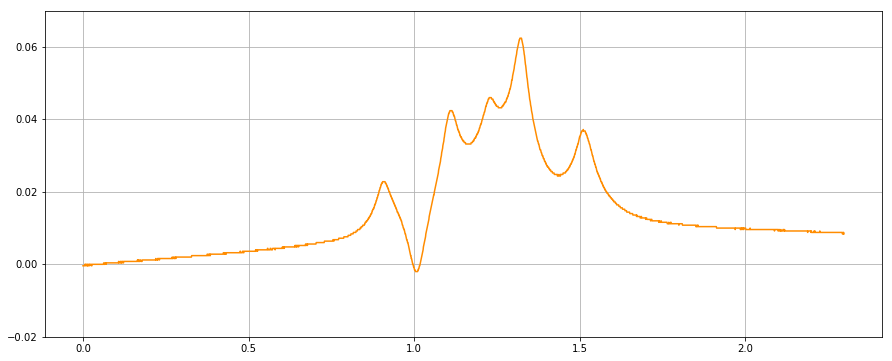

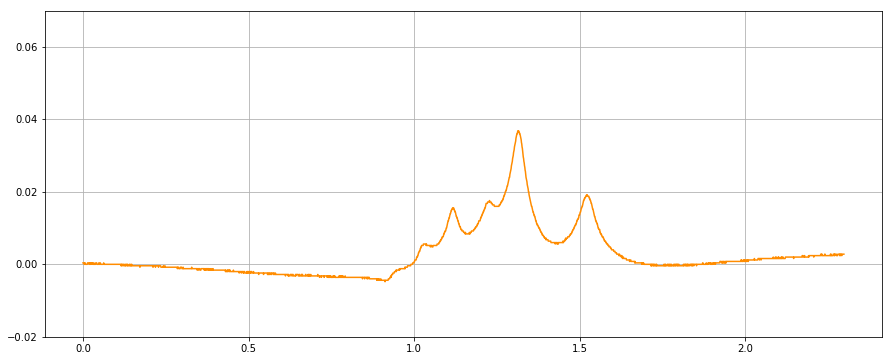

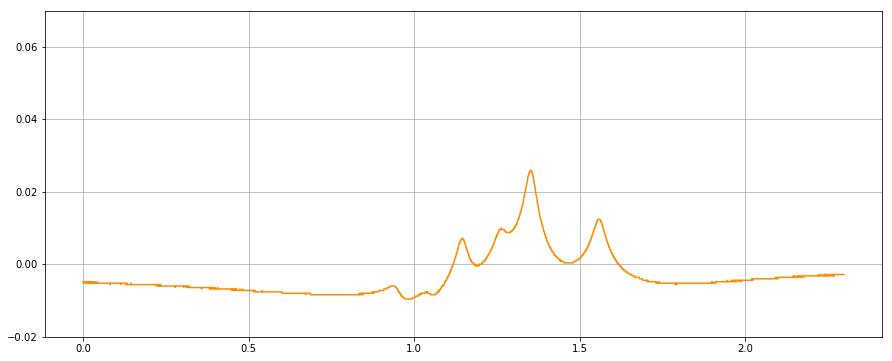

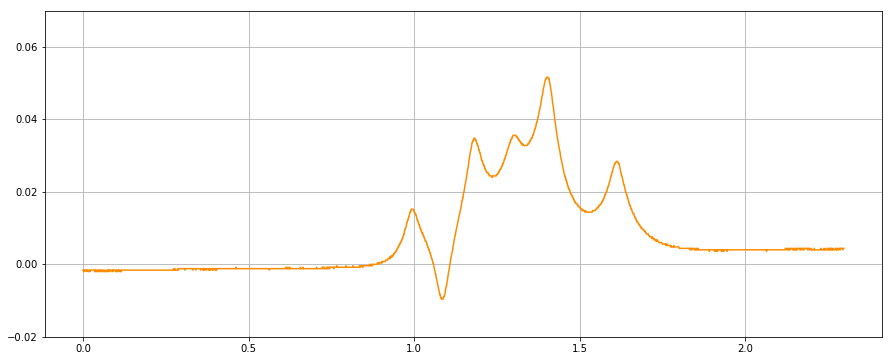

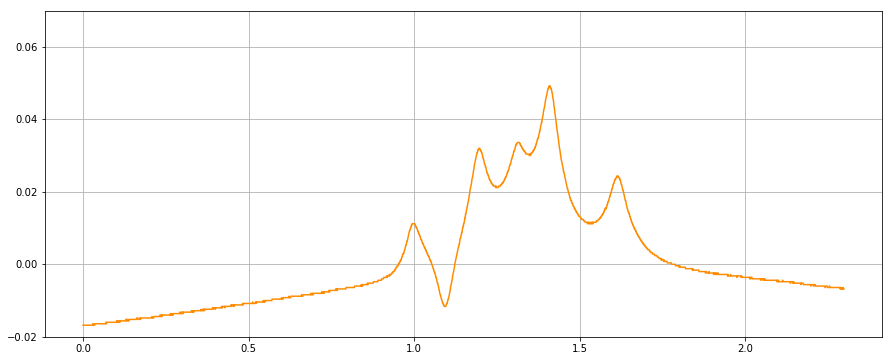

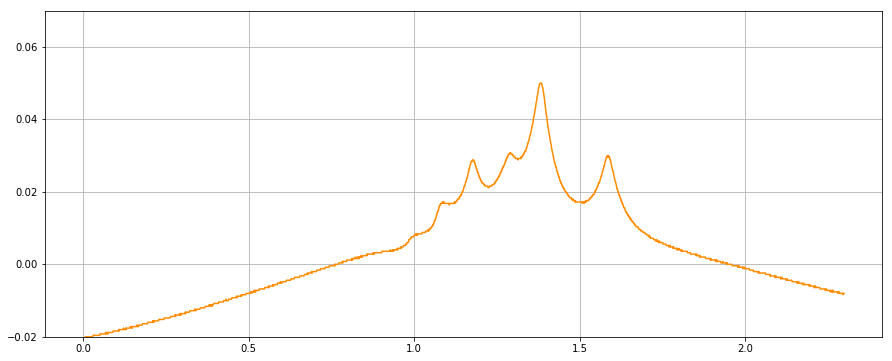

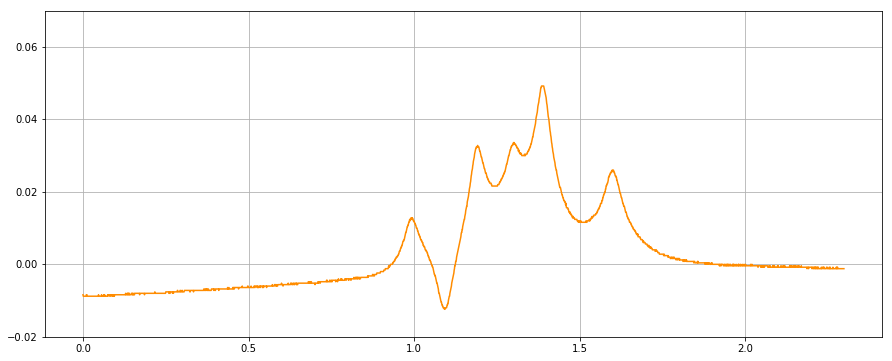

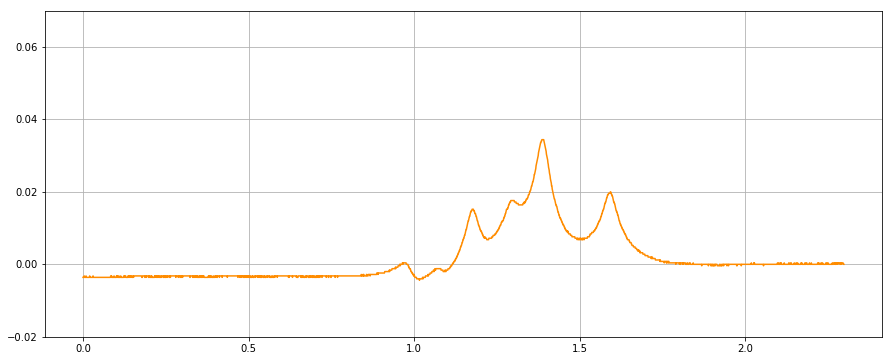

In [30]:
def Trim(ref,array,low,high):
    out = []
    for i in range(len(ref)):
        if ref[i]<high and ref[i]>low:
            out.append(array[i])
    return out

def main(file,PlotBounds,One,Two,Save):
    csvPath = filepath + 'Oscilloscope Trace Files\\Star Objective\\Polarisation\\' + file;
    savePath = filepath + 'Python Images\\Polarisation\\'

    #Open .csv File
    datafile = open(csvPath, 'r');
    datareader = csv.reader(datafile, delimiter=',');
    sheet = [];
    for row in datareader:
        sheet.append(row);
    
    FPOne = 0.00146
    FPTwo = 0.001895
    #FPOne = 0.000
    #FPTwo = 1.000
    
    
    CH1_y = [float(i[ 4]) * float(sheet[8][1]) + float(sheet[9][1]) for i in sheet];
    CH1_x = [float(i[ 3]) * float(sheet[11][1]) for i in sheet];
    CH2_y = [float(i[10]) * float(sheet[8][7]) + float(sheet[9][7]) for i in sheet];
    CH2_x = [float(i[ 9]) * float(sheet[11][7]) for i in sheet];
        
    #CH1_x = [(i-FPOne) * (1) /(FPTwo - FPOne) for i in CH1_x]
    #CH2_x = [(i-FPOne) * (1) /(FPTwo - FPOne) for i in CH2_x]
    CH1_x = [(i-min(CH1_x)) * (1) /(FPTwo - FPOne) for i in CH1_x]
    CH2_x = [(i-min(CH2_x)) * (1) /(FPTwo - FPOne) for i in CH2_x]
    x = linspace(min(CH1_x), max(CH1_x),512)
    fig= figure(figsize = (15,6));
    plot(CH1_x, CH1_y,color = "darkorange", linewidth = 1.5, label= "Channel 1") #Raw Data
    #plot(CH2_x, CH2_y,color = "lightskyblue", linewidth = 0.5,label= "Channel 2") #Raw Data
    if(PlotBounds):
        plot([float(One),float(One)],[min([CH1_y,CH2_y]),max([CH1_y,CH2_y])], c = "grey")
        plot([float(Two),float(Two)],[min([CH1_y,CH2_y]),max([CH1_y,CH2_y])], c = "grey")
    grid();ylim(-0.02,0.07)
    if( Save ): fig.savefig(savePath + file + " .png")
    #print(min(Trim(CH1_x,CH1_y,float(One),float(Two))) - (CH1_y[0] + CH1_y[len(CH1_y)-1])/2)
    return 
interact(main,
     file = os.listdir(filepath + 'Oscilloscope Trace Files\\Star Objective\\Polarisation'),
     PlotBounds = False,
     One = "0.00155",
     Two = "0.00160",
     Save = False
     )

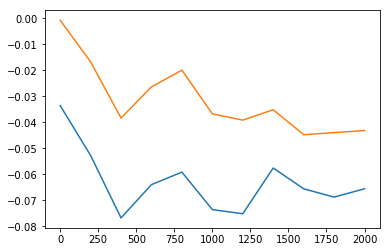

In [4]:
FromZero = [
-0.03360000412400012,
-0.052800002221999986,
-0.07680000431600004,
-0.06400000757000021,
-0.059200003574000036,
-0.0736000096000003,
-0.07520000695800017,
-0.05760000621600016,
-0.06560000492800008,
-0.06880000560400011,
-0.06560000492800008
]

FromAverage = [
-0.0008000024050001109,
-0.01679999982679995,
-0.038400001413599984,
-0.02640000483680017,
-0.01999999901189991,
-0.03680000554500019,
-0.039200004190000116,
-0.03520000520590016,
-0.0448000042561001,
-0.0440000040870001,
-0.04320000242720002
]
plot(arange(0,2001,200),FromZero)
plot(arange(0,2001,200),FromAverage)

<IPython.core.display.Javascript object>


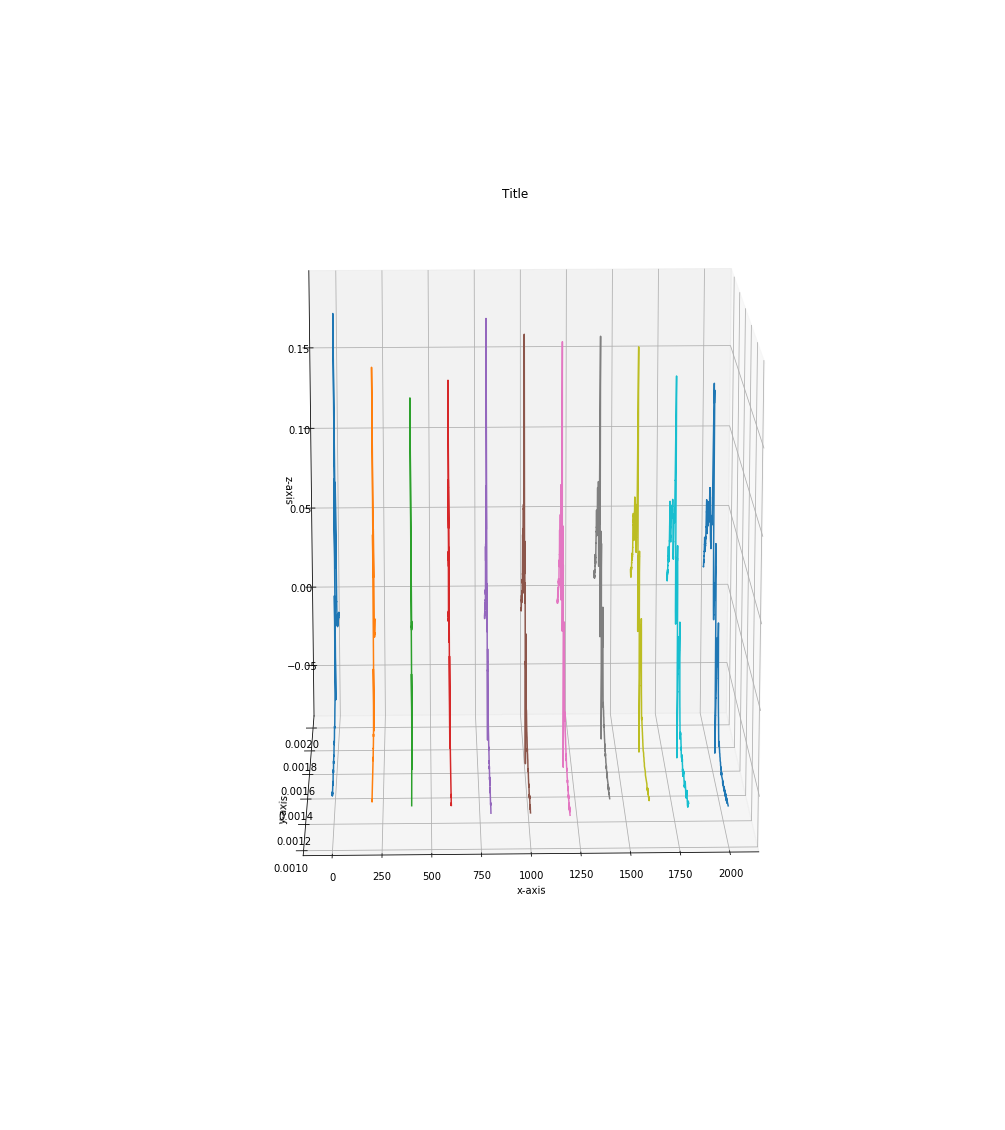

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [6]:
%matplotlib notebook
i = 0
fig = figure()
ax = axes(projection = '3d')
for file in os.listdir(filepath + 'Oscilloscope Trace Files\\Star Objective\\Magnet'):
    csvPath = filepath + 'Oscilloscope Trace Files\\Star Objective\\Magnet\\' + file;

    I = []
    T = []
    V = []
    datafile = open(csvPath, 'r');
    datareader = csv.reader(datafile, delimiter=',');
    sheet = [];
    for row in datareader:
        sheet.append(row);
        
    CH1_y = [float(i[ 4]) * float(sheet[8][1]) + float(sheet[9][1]) for i in sheet]
    CH1_x = [float(i[ 3]) * float(sheet[11][1]) for i in sheet];
    for j in range(len(CH1_y)):
        I.append(200*i)
        T.append(CH1_x[j])
        V.append(CH1_y[j])
    ax.plot(I, T, V)
    i+=1

ax.set_title("Title")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")
legend()
show()